# **Capstone II Data Wrangling**

### **Section 1: Imports and Initial Inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data = pd.read_csv("../raw_data/heart_data_raw.csv")

In [3]:
print(heart_data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **1.1 Explanation of Columns**

- Age: The participant's age (28 to 77).

- Sex: The participant's sex (M or F).

- ChestPainType: TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic.
    Angina is a kind of chest pain, and is often described as a squeezing or pressure around the heart area. Angina can be considered atypical if it occurs less predictably and in varying degrees of pain. We take non-anginal pain to be any other kind of bodily pain that isn't obviously not related to the heart. For example, the pain of a stubbed toe does not count as non-anginal pain, but perhaps an aching thigh might. We take asymptomatic to mean the complete absence of angina or any pain that might be related to it.
    
- RestingBP: Resting blood pressure in mmHg. Ranges from 80 to 200 mmHg. Blood pressure is the pressure of circulating blood against the boundaries of blood vessels. This is most likely systolic measurements, which have a higher domain than diastolic. Normal resting BP is below 120, and anything above 130 is hypertension territory. Above 180 and you should consult a doctor immediately.

- Cholesterol: serum cholesterol (mg/dl). Cholesterol is a waxy fatty substance present in our bloodstream. It is absolutely essential for survival, being involved in things like hormone regulation, cell structure, and vitamin synthesis. It is important to note here that serum, or blood, cholesterol is not the same thing as dietary cholesterol. If serum cholesterol is found to be a risk factor for HD, it doesn't necessarily say anything about dietary cholesterol. A sample of serum cholesterol is measured in milligrams of cholesterol per deciliter of blood.

- FastingBS: Fasting blood sugar. 1 if FastingBS > 120 mg/dl, 0 otherwise. Blood sugar is the measure of glucose (in milligrams) concentrated in (1 deciliter) of blood. A fasting blood sugar level of less than 100 is normal. 100-120 is thought of as pre-diabetic levels. A person with a fasting blood sugar over 120 is diabetic.

- RestingECG: Resting electrocardiogram results. Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria. Cardiograms measure electrical impulse vs. time. 

- MaxHR: Maximum heart rate achieved. Numeric value between 60 and 202 beats per minute. A common rule of thumb for what your maximum heart rate should be (without measuring) is to subtract your age from 220. Then, our youngest participant(age 28) would have a theoretical maximum heart rate of 192, and our eldest participant (77) would have a theoretical maximum heart rate of 143.

- ExerciseAngina: exercise-induced angina. Y: Yes, N: No.

- Oldpeak: Oldpeak = ST. Numeric value measured in depression. ST depression refers to an ECG segment abnormally below the baseline. Since the oldpeak metric here is tracked in positive millimeters *below* the baseline, negative measurements must mean millimeters above the baseline. The ST segment is a portion of an ECG that occurs after the QRS complex, and before the T wave. Normally, with a healthy heart, this segment would be mostly flat on the baseline. It is when it is measured below the baseline (positive numbers in this dataset) that HD may be a concern.

- ST_Slope: The slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping. Again, this is the same portion of the ECG as in oldpeak. This feature is measuring the slope of the ST segment, rather than its position on or below the baseline. A flat or up ST_slope would be normal, as the ECG signal must increase positively to get back to the baseline from the end of the QRS segment, which is typically quite negative. 

### 1.2 Validating Numerical Columns

In [7]:
heart_data['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

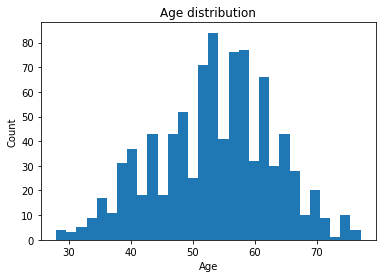

In [8]:
# Age looks good, no changes necessary.
plt.hist(heart_data['Age'], bins = 30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

In [9]:
# Minimum blood pressure of 0 must be addressed.
heart_data['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [10]:
# Only one blood pressure entry below 50.
heart_data[heart_data['RestingBP'] < 50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [11]:
# We will drop this value, as it also has 0 for cholesterol.
heart_data = heart_data.drop(449)
heart_data[heart_data['RestingBP'] < 50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [12]:
heart_data['RestingBP'].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

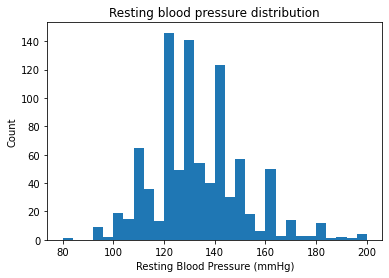

In [13]:
plt.hist(heart_data['RestingBP'], bins = 30)
plt.xlabel('Resting Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.title('Resting blood pressure distribution')
plt.show()

In [14]:
# Minimum cholesterol of zero must be addressed.
heart_data['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [15]:
# Check for entries under 85 (an arbitrarily low value but still high enough to be in the realm of possibility).
heart_data[heart_data['Cholesterol'] < 85].sort_values(by = 'Cholesterol', ascending = False)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
410,62,M,ASY,150,0,1,ST,78,N,2.0,Flat,1
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
403,52,M,ASY,135,0,1,Normal,128,Y,2.0,Flat,1
404,47,M,NAP,110,0,1,Normal,120,Y,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
351,43,M,ASY,140,0,0,ST,140,Y,0.5,Up,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
353,58,M,ASY,130,0,0,ST,100,Y,1.0,Flat,1
354,55,M,ASY,120,0,0,ST,92,N,0.3,Up,1


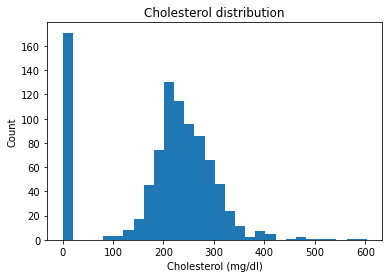

In [16]:
# Lots of zeroes.
plt.hist(heart_data['Cholesterol'], bins = 30)
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.title('Cholesterol distribution')
plt.show()

In [17]:
# Cholesterol has 171 entries of zero, which is ~23% of all the entries in cholesterol.
# 23% percent of entries for this column is a lot of data. We will investigate these 171 zero entries.
cholest_dict = {'Zero Cholesterol Count': heart_data[heart_data['Cholesterol'] < 85]['Cholesterol'].count(), 
                'Percentage of Zero Cholesterols': 
                (heart_data[heart_data['Cholesterol'] < 85].shape[0] / 
                 (heart_data.shape[0] - heart_data[heart_data['Cholesterol'] < 85].shape[0]) * 100)}
pd.DataFrame(data = cholest_dict, index = [1])

,Zero Cholesterol Count,Percentage of Zero Cholesterols
1,171,22.922252


In [18]:
# Load in all the seperate datasets. Perhaps we can find a regularity amongst the entries with 0 for cholesterol.
va = pd.read_csv(r"../raw_data/processed.va.data")
cleveland = pd.read_csv(r"../raw_data/processed.cleveland.data")
switzerland = pd.read_csv(r"../raw_data/processed.switzerland.data")
hungarian = pd.read_csv(r"../raw_data/reprocessed.hungarian.data")

In [19]:
# They're all equally inscrutable.
va.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [20]:
# Prepare to merge them all into one dataframe.
# Hungarian has one column. needs to be 14 to match the othe dataframes.
va.shape, cleveland.shape, switzerland.shape, hungarian.shape

((199, 14), (302, 14), (122, 14), (293, 1))

In [21]:
hungarian.head()

,40 1 2 140 289 0 0 172 0 0 -9 -9 -9 0
0,49 0 3 160 180 0 0 156 0 1 2 -9 -9 1
1,37 1 2 130 283 0 1 98 0 0 -9 -9 -9 0
2,48 0 4 138 214 0 0 108 1 1.5 2 -9 -9 3
3,54 1 3 150 -9 0 0 122 0 0 -9 -9 -9 0
4,39 1 3 120 339 0 0 170 0 0 -9 -9 -9 0


In [22]:
# Change dataframe to have 14 columns.
column = hungarian.columns.values[0]
hungarian = hungarian[column].str.split(' ', expand=True)

In [23]:
hungarian.shape

(293, 14)

In [24]:
# Function to rename columns and add new column for dataframe source.
def renamer(dataframe, source):
    new_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
                   'oldpeak', 'slope', 'ca', 'thal', 'num'] #column names taken from documentation
    if source == 'hungarian':
        old_columns = list(dataframe.columns.values)
        for name in old_columns:
            name = str(name)
    else:
        old_columns = list(dataframe.columns.values)
    mapper = dict(zip(old_columns, new_columns))
    dataframe = dataframe.rename(mapper = mapper, axis = 1)
    dataframe['source'] = source
    return dataframe

In [25]:
# Apply function to each dataframe.
va = renamer(va, 'va')
cleveland = renamer(cleveland, 'cleveland')
switzerland = renamer(switzerland, 'switzerland')
hungarian = renamer(hungarian, 'hungarian')
va.shape, cleveland.shape, switzerland.shape, hungarian.shape

((199, 15), (302, 15), (122, 15), (293, 15))

In [26]:
# Combine all the dataframes.
seperate_dfs = [cleveland, switzerland, hungarian]
combined_dfs = va.append(seperate_dfs)

In [27]:
combined_dfs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0,va
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2,va
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1,va
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0,va
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0,va


In [28]:
combined_dfs.shape

(916, 15)

In [29]:
# All 0 cholesterol values come from the switzerland dataset...
combined_dfs[combined_dfs['chol'] == 0]['source'].unique()

array(['switzerland'], dtype=object)

In [30]:
# Furthermore, the switzerland data set has all zeros for cholesterol.
switzerland['chol'].unique()

array([0], dtype=int64)

In [31]:
# Difference between switzerland dataframe and final dataframe's list of zero cholesterol entries is 49.
len(switzerland), len(heart_data[heart_data['Cholesterol'] == 0])

(122, 171)

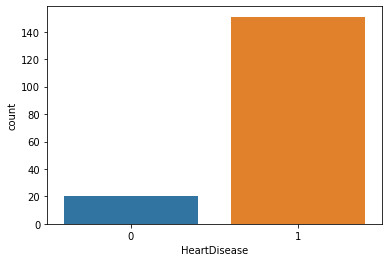

In [32]:
# Something else to consider is the amount of heart disease that occurred for this data from switzerland.
sw = heart_data[heart_data['Cholesterol'] == 0]
sns.countplot(data = sw, x = 'HeartDisease')
plt.show()

That's a pretty one sided distribution of heart disease havers among the Swiss portion of the data set.

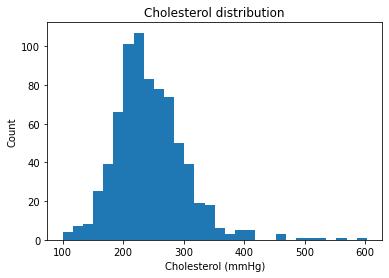

In [33]:
# Check cholesterol distribution without zero entries.
cholesterol_no_zeroes = heart_data[heart_data['Cholesterol'] > 85]['Cholesterol']
plt.hist(cholesterol_no_zeroes, bins = 30)
plt.xlabel('Cholesterol (mmHg)')
plt.ylabel('Count')
plt.title('Cholesterol distribution')
plt.show()

In light of the fairly normal, but slightly right skewed distribution of cholesterol, I feel median is an appropriate number to impute. Especially considering all the positive HD cases we'll lose if we abandon this data.

In [34]:
# Impute the median value for cholesterol, in place of zero.
heart_data['Cholesterol'] = heart_data['Cholesterol'].replace(0, heart_data['Cholesterol'].median())
heart_data['Cholesterol'].describe()

count    917.000000
mean     240.600872
std       54.009298
min       85.000000
25%      214.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [35]:
heart_data['MaxHR'].describe()

count    917.000000
mean     136.789531
std       25.467129
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

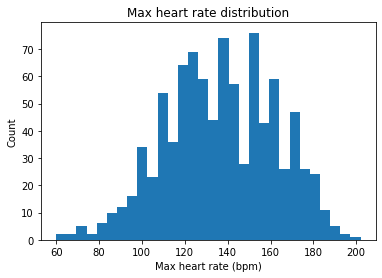

In [36]:
plt.hist(heart_data['MaxHR'], bins = 30)
plt.xlabel('Max heart rate (bpm)')
plt.ylabel('Count')
plt.title('Max heart rate distribution')
plt.show()

In [37]:
# Minimum Oldpeak value is negative.
heart_data['Oldpeak'].describe()

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

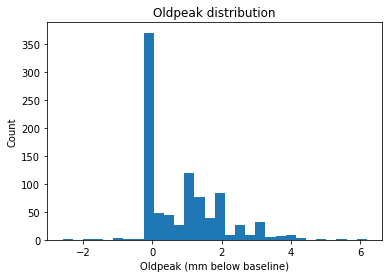

In [38]:
plt.hist(heart_data['Oldpeak'], bins = 30)
plt.xlabel('Oldpeak (mm below baseline)')
plt.ylabel('Count')
plt.title('Oldpeak distribution')
plt.show()

In [39]:
heart_data[heart_data['Oldpeak'] < 0]['Oldpeak'].count()

13

### 1.2 Validating Categorical and Text Columns

In [40]:
# Check to see if there are any entries in the Sex column that are not M or F.
len(heart_data[(heart_data['Sex'] == 'M') + (heart_data['Sex'] == 'F')]) == len(heart_data)

True

In [41]:
# Check to see if there are any entries in the Chest pain type column that are not TA, NAP, ATA, or ASY.
len(heart_data[(heart_data['ChestPainType'] == 'TA') 
               + (heart_data['ChestPainType'] == 'NAP') 
               + (heart_data['ChestPainType'] == 'ATA')
               + (heart_data['ChestPainType'] == 'ASY')]) == len(heart_data)

True

In [42]:
# Check to see if there are any entries in the FastingBS column that are not 0 or 1.
len(heart_data[(heart_data['FastingBS'] == 0) 
               + (heart_data['FastingBS'] == 1)]) == len(heart_data)

True

In [43]:
# Check to see if there are any entries in the Resting ECG column that are not Normal, ST, or LVH.
len(heart_data[(heart_data['RestingECG'] == 'Normal') 
               + (heart_data['RestingECG'] == 'ST') 
               + (heart_data['RestingECG'] == 'LVH')]) == len(heart_data)

True

In [44]:
# Check to see if there are any entries in the ExerciseAngina column that are not N or Y.
len(heart_data[(heart_data['ExerciseAngina'] == 'N') 
               + (heart_data['ExerciseAngina'] == 'Y')]) == len(heart_data)

True

In [45]:
# Check to see if there are any entries in the ST_Slope column that are not Up, Flat, or Down.
len(heart_data[(heart_data['ST_Slope'] == 'Up') 
               + (heart_data['ST_Slope'] == 'Flat') 
               + (heart_data['ST_Slope'] == 'Down')]) == len(heart_data)

True

In [46]:
# Check to see if there are any entries in the HeartDisease column that are not 0 or 1.
len(heart_data[(heart_data['HeartDisease'] == 0) 
               + (heart_data['HeartDisease'] == 1)]) == len(heart_data)

True

In [47]:
# Save the data to a new csv file.
heart_data.to_csv('../Data/heart_data_cleaned.csv', index=False)

In [48]:
# Also need to save a version with the zero cholesterol values dropped.
df = pd.read_csv("../raw_data/heart_data_raw.csv")

In [49]:
df = df[df['Cholesterol'] != 0]

In [50]:
df.to_csv('../Data/heart_data_dropped_chol.csv', index=False)

## **Summary**

The raw .csv file comes to us with 918 rows and 12 columns. The columns have a lot of mixed data types, with the slight majority being integers. There are no missing values. We then move on to validate the data.

Integer columns: 

RestingBP has a minimum of 0, which only a dead person could have. Max is 200, which is severely above average, but perhaps not invalid given the nature of our dataset. We filter for results below 50, and find only the one zero entry. We see that this entry has zero for other columns a living person could not have zero for, like cholesterol. We delete this entry.

Cholesterol has 171 zero entries, about 23% of the data, which seem to be in error. This is too significant a portion of the data to pass over without further investigation. As noted below, this dataset is actually composed of four or five other datasets that come from Hungary, Switzerland, and the United States. The uploader provided a means to retrieve each original dataset. Using those datasets, we found that the dataset from Switzerland was the only dataset with zeros for cholesterol, and every single cholesterol entry in it is zero. Curiously, the combined dataset as it's provided on kaggle has 171 entries with zero for cholesterol, while the switzerland dataset has only 122 entries. Somehow 49 new observations, presumably also from Switzerland, were added into the final dataset. I will attempt to model the data both with imputed values for and without the 171 entries with zero for cholesterol. Both approaches are justifiable to some extent. Since the suspicious zero cholesterol data all comes from the same place, dropping the values is at least systematic and may not necessarily harm the predictive power of the rest of the data. On the other hand, since the cholesterol column without the zero entries has a reasonably normal distribution with a slight right skew, the median value may be a good value to impute.

Oldpeak has 13 negative values. This isn't actually a problem, but it is a confusing data convention. Since the oldpeak metric here is tracked in positive millimeters *below* the baseline, negative measurements must mean millimeters above the baseline.

All other categories seem to check out.

The original dataset uploader has provided a link for the sources of this dataset: 

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In their original upload, they identify 5 sources from which this combined dataset comes from:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations

In some of the documentation found in the above repository, they only identify 4 sources (Stalog is missing).